In [1]:
import pylab as PL
import random as RD
import scipy as SP
import numpy as np
import matplotlib.pyplot as plt

RD.seed()

width = 50
height = 50
initProb = 0.01
infectionRate = 0.85
regrowthRate = 0.15

In [2]:
#exc: 11.8:
def init():
    global time, config, nextConfig, health_prop, infect_prop
    health_prop = []
    infect_prop= []
    time = 0
    
    config = SP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = 2
            else:
                state = 1
            config[y, x] = state

    nextConfig = SP.zeros([height, width])



In [3]:
def draw():
    PL.cla()
    PL.pcolor(config, vmin = 0, vmax = 2, cmap = PL.cm.jet)
    PL.axis('image')
    PL.title('t = ' + str(time))


In [4]:
def step():
    global time, config, nextConfig, health_prop
    
    health_prop.append(len(config.ravel()[config.ravel()==1])/2500)
    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == 0:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == 1:
                            if RD.random() < regrowthRate:
                                state = 1
            elif state == 1:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == 2:
                            if RD.random() < infectionRate:
                                state = 2
            else:
                state = 0

            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config



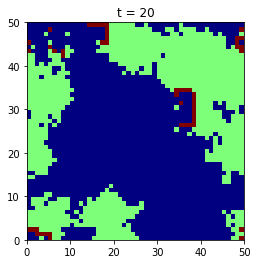

In [5]:
init()
for i in range(20):
    step()
draw()


In [6]:
infect_prop= 1 - np.array(health_prop)

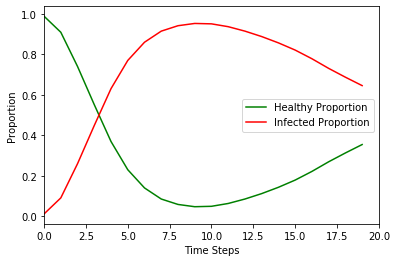

In [7]:
steps =[i for i in range(20)] 
plt.plot(steps,health_prop, label = "Healthy Proportion", color = 'green' )
plt.plot(steps,infect_prop, label = "Infected Proportion", color = 'red' )
plt.legend()
plt.xlim(0, 20)
plt.xlabel("Time Steps")
plt.ylabel("Proportion")
plt.show()

In [8]:
#12.6
#We see that the probabilities represent all possible four states of a cell: 
#(current_state, next_state): (0,0), (0, 1), (1, 0), (1, 1). Since these are the only four possible cases, then 
#by definition, the probabilities must sum up to 1.

In [9]:
#12.7:
def f(p):
    return (84*p**9 - 560*p**8 + 1540*p**7 - 2240*p**6 + 1820*p**5 - 784*p**4 + 140*p**3)

Text(0, 0.5, 'p_t+1')

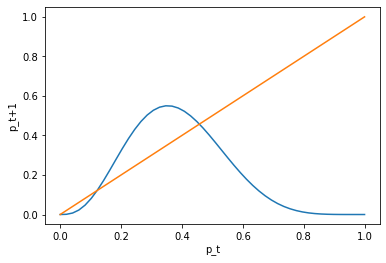

In [10]:
p = np.linspace(0, 1)
plt.plot(p, f(p))
plt.plot(p, p)
plt.xlabel("p_t")
plt.ylabel("p_t+1")